# Combined Data Baseline Notebook

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np 
import glob
import os
from os.path import isfile, join
import soundfile as sf 
import sys
import librosa 
import librosa.display
import seaborn as sbn
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from IPython.display import Audio
import scipy.io.wavfile
from scipy.fftpack import dct
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

In [18]:
# Folder Paths
RavdessData = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/RAVDESS_Baseline/"
CasiaData = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/CASIA_Baseline/"
EmodbData = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/EmoDB_Baseline/"
UrduData = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/URDU_Baseline/"
Combined = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline/"

In [62]:
# Extracting RAVDESS data
fileEmotion_RAVDESS = []
filePath_RAVDESS= []
RavdessList = os.listdir(RavdessData)
for dir in RavdessList:
    if dir[16] == '1':
        x = 'n'
    elif dir[16] == '3':
        x = 'h'
    elif dir[16] == '4':
        x = 's'
    elif dir[16] == '5':
        x = 'a'
    save = Combined + x +'_'+'R'+'_'+dir
    signal, sr = librosa.load(RavdessData+dir)
    soundfile.write(save, signal, sr)

In [63]:
# Extracting Emodb data
EmodbList = os.listdir(EmodbData)
for dir in EmodbList:
    if dir[5] == 'N':
        x = 'n'
    elif dir[5] == 'F':
        x = 'h'
    elif dir[5] == 'T':
        x = 's'
    elif dir[5] == 'W':
        x = 'a'
    save = Combined + x +'_'+'E'+'_'+dir
    signal, sr = librosa.load(EmodbData+dir)
    soundfile.write(save, signal, sr)

In [64]:
# Extracting CASIA data
CasiaList = os.listdir(CasiaData)
for dir in CasiaList:
    save = Combined + dir[4] +'_'+'C'+'_'+dir
    signal, sr = librosa.load(CasiaData+dir)
    soundfile.write(save, signal, sr)

In [65]:
# Extracting URDU data
for dir in UrduList:
    save = Combined + dir[0] +'_'+'U'+'_'+dir
    signal, sr = librosa.load(UrduData+dir)
    soundfile.write(save, signal, sr)

In [66]:
# Extracting Labels
emotionList = []
CombinedList = os.listdir(Combined)
for dir in CombinedList:
    if dir[0] == 'n': #Neutral
        x = 3
    elif dir[0] == 'h': #Happy
        x = 0
    elif dir[0] == 's': #Sad
        x = 1
    elif dir[0] == 'a': #Angry
        x = 2
    emotionList.append(x)
print(len(emotionList))

2211


In [67]:
# Extract paths
pathList = []
for dir in CombinedList:
    pathList.append(dir)

In [68]:
# Create dataframe of label and path
df = pd.DataFrame({'Label':emotionList, 'Path':pathList})
df

,Label,Path
0,2,a_C_201-angry-liuchanhg.wav
1,2,a_C_201-angry-wangzhe.wav
2,2,a_C_201-angry-zhaoquanyin.wav
3,2,a_C_201-angry-ZhaoZuoxiang.wav
4,2,a_C_202-angry-liuchanhg.wav
...,...,...
2206,1,s_U_s_SM27_F4_S096.wav
2207,1,s_U_s_SM6_F1_S097.wav
2208,1,s_U_s_SM6_F2_S098.wav
2209,1,s_U_s_SM6_F3_S099.wav


In [69]:
# Classifying emotions and their corresponding dataset as title
title = []
for path in df.Path:
    title.append(path[0:3])
df['Title'] = title

In [70]:
df['Title'].value_counts()

a_C    200
h_C    200
n_C    200
s_C    200
a_R    192
h_R    192
s_R    192
a_E    127
a_U    100
h_U    100
n_U    100
s_U    100
n_R     96
n_E     79
h_E     71
s_E     62
Name: Title, dtype: int64

In [71]:
# Save files in a way with identifying which emotion and dataset they are from
# Ensure there are only 62 files per emotion per dataset
destination = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline_Shortened/"
CombinedList = os.listdir(Combined)
countaC = 0
counthC = 0
countnC = 0
countsC = 0
countaR = 0
counthR = 0
countnR = 0
countsR = 0
countaE = 0
counthE = 0
countnE = 0
countsE = 0
countaU = 0
counthU = 0
countnU = 0
countsU = 0
for dir in CombinedList:
    if dir[0:3] == 'a_C':
        countaC = countaC + 1
        if countaC <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'h_C':
        counthC = counthC + 1
        if counthC <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'n_C':
        countnC = countnC + 1
        if countnC <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 's_C':
        countsC = countsC + 1
        if countsC <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'a_R':
        countaR = countaR + 1
        if countaR <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'h_R':
        counthR = counthR + 1
        if counthR <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'n_R':
        countnR = countnR + 1
        if countnR <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 's_R':
        countsR = countsR + 1
        if countsR <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'a_E':
        countaE = countaE + 1
        if countaE <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'h_E':
        counthE = counthE + 1
        if counthE <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'n_E':
        countnE = countnE + 1
        if countnE <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 's_E':
        countsE = countsE + 1
        if countsE <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'a_U':
        countaU = countaU + 1
        if countaU <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'h_U':
        counthU = counthU + 1
        if counthU <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'n_U':
        countnU = countnU + 1
        if countnU <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 's_U':
        countsU = countsU + 1
        if countsU <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)


In [76]:
# Extract labels and file duration
destination = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline_Shortened_Cropped/"
home = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline_Shortened/"
homeList = os.listdir(home)
fileDuration = []
label =[]
for dir in homeList:
    signal, sr = librosa.load(home+dir)
    fileDuration.append(len(signal))
    label.append(dir[0])

a    248
h    248
n    248
s    248
Name: Label, dtype: int64

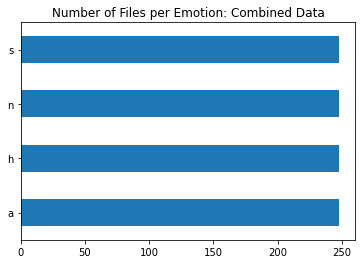

In [77]:
# Add duration to data frame
# Count number of files
df = pd.DataFrame({'Label':label, 'Duration':fileDuration})
distribution = df['Label'].value_counts().plot(kind='barh', title='Number of Files per Emotion: Combined Data')
df['Label'].value_counts()


In [78]:
# Calculate durations to determine cutoff
avgDuration = sum(df['Duration'])/len(df['Duration'])
minDuration = min(df['Duration'])
maxDuration = max(df['Duration'])
print(avgDuration/sr)
print(minDuration/sr)
print(maxDuration/sr)

df["Duration_sec"] = df['Duration']/sr 

2.8199886621315193
2.0
4.0


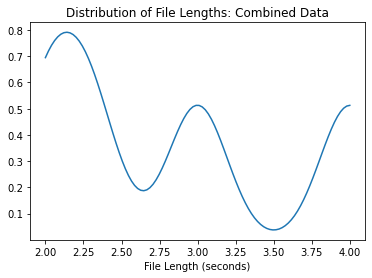

75.0% of files have a length shorter than 3.00 seconds.


In [79]:
# Plot distribution of file lengths
from scipy.stats import gaussian_kde

pdf = gaussian_kde(df['Duration_sec'])#, bins = 30)#.plot(kind='kde', title="Distribution of File Lengths: EmoDB")
x = np.linspace(df['Duration_sec'].min(), df['Duration_sec'].max(), 100)
plt.plot(x,pdf(x))
plt.xlabel("File Length (seconds)")
plt.title("Distribution of File Lengths: Combined Data")
plt.show()

cdf = df['Duration_sec'].value_counts(normalize=True).sort_index().cumsum()

threshold = 0.75
point = cdf[cdf <= threshold].index.max()
print(f"{threshold*100}% of files have a length shorter than {point:.2f} seconds.")
# 5 seconds is good to cut

In [80]:
# Baseline Pre-Procesing Method
# Crop/Zero-pad all files to 3s
setfileDuration = 3*sr 
destination = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline_Shortened_Cropped/"
home = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline_Shortened/"
homeList = os.listdir(home)
fileDuration = []
label =[]
i = 0
for dir in homeList:
    signal, sr = librosa.load(home+dir)
    savePath = destination + dir
    if df['Duration_sec'][i] != setfileDuration :
        trimmedFiles = librosa.util.fix_length(signal, int(setfileDuration))
        soundfile.write(savePath, trimmedFiles, sr)
    else:
        soundfile.write(savePath, signal, sr)
    i = i+1
    

In [1]:
# Extract MFCC Features
from os import listdir
from os.path import isfile, join
data = []
label = []
Path = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline_Shortened_Cropped/"
files = [f for f in listdir(Path) if isfile(join(Path, f))]
for x in files:
    filePath = Path + x
    label.append(x[0])
    signal, sr = librosa.load(filePath, sr=None)
    #mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 20) 
    mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18) 
    #mfcc_1d = np.ravel(mfcc)
    data.append(mfcc)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00170898 -0.00195312 -0.00170898 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.0007019  -0.00100708 -0.00091553 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00119019 -0.00186157 -0.00170898 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00100708 -0.00152588 -0.00143433 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00073242 -0.00115967 -0.00109863 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00149536 -0.0017395  -0.00161743 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00186157 -0.00286865 -0.00271606 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00109863 -0.00161743 -0.00152588 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00189209 -0.00219727 -0.00192261 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[ 0.00024414  0.         -0.00054932 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[0.00073242 0.00073242 0.0005188  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(sign

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[ 3.0517578e-05 -6.1035156e-05 -1.5258789e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[ 0.         -0.00018311 -0.0005188  ... -0.02401733  0.05709839
 -0.03356934] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[0.0000000e+00 6.1035156e-05 9.1552734e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[ 0.00024414  0.00027466  0.00018311 ...  0.0065918  -0.04620361
  0.02542114] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-6.1035156e-05 -9.1552734e-05 -9.1552734e-05 ...  9.1552734e-05
  6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  6.1035156e-05
  9.1552734e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 3.0517578e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result i

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.10220337 -0.1338501  -0.09286499 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.03411865 -0.05337524 -0.04977417 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signa

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[ 0.00036621 -0.01696777 -0.02267456 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[0.00949097 0.01141357 0.01416016 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[0.03414917 0.0475769  0.0352478  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_lengt

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00146484 -0.00219727 -0.00201416 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00115967 -0.00149536 -0.00100708 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00283813 -0.00430298 -0.00411987 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00115967 -0.00177002 -0.00167847 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00100708 -0.00140381 -0.00125122 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00125122 -0.00186157 -0.00177002 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[0.00045776 0.00054932 0.00039673 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[ 0.00030518  0.00015259 -0.00033569 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[0.00024414 0.0005188  0.00067139 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_lengt

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[ 6.1035156e-05 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[0.00152588 0.00177002 0.00152588 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[0.00143433 0.00189209 0.00061035 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(sig

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[0.         0.         0.         ... 0.00018311 0.00027466 0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc =

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -6.1035156e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ... -8.8500977e-04
 -3.9672852e-04 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will re

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00588989 -0.00979614 -0.0098877  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[0.02087402 0.03457642 0.03530884 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[0.00930786 0.01449585 0.01400757 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_lengt

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.05154419 -0.07327271 -0.06304932 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.04629517 -0.07470703 -0.07400513 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00079346 -0.0012207  -0.00109863 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00259399 -0.00402832 -0.00402832 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.0010376  -0.00164795 -0.00167847 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00057983 -0.00091553 -0.00085449 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00109863 -0.00167847 -0.00161743 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00045776 -0.0007019  -0.00067139 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00286865 -0.00454712 -0.00436401 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[6.1035156e-05 3.0517578e-05 9.1552734e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[0.00033569 0.00054932 0.00061035 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00210571 -0.00234985 -0.00152588 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00030518 -0.00036621 -0.00030518 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[ 0.0010376   0.00119019  0.00085449 ... -0.00186157 -0.00167847
 -0.00146484] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[ 3.0517578e-05 -6.1035156e-05 -3.6621094e-04 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mf

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ... -9.1552734e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  3.0517578e-05 ...  6.1035156e-04
  6.4086914e-04  6.4086914e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-1.2207031e-04 -2.7465820e-04 -6.1035156e-05 ... -1.5258789e-04
 -1.5258789e-04 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will re

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will re

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[0.00079346 0.03662109 0.05581665 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.04278564 -0.06677246 -0.05645752 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.04003906 -0.05270386 -0.04785156 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00097656 -0.0015564  -0.00146484 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00308228 -0.00466919 -0.00457764 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00100708 -0.00143433 -0.00137329 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00094604 -0.00137329 -0.00125122 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.0027771  -0.00442505 -0.00375366 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00088501 -0.00134277 -0.00115967 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[ 1.5258789e-04  3.0517578e-05  6.1035156e-05 ...  1.1291504e-02
 -1.8615723e-02  1.5533447e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.02053833 -0.02377319 -0.02041626 ...  0.10458374  0.10543823
  0.10467529] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.02389526 -0.02478027 -0.01895142 ...  0.37728882  0.36828613
  0.34796143] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.fe

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[ 0.00280762  0.00305176  0.00274658 ... -0.01702881 -0.02365112
 -0.06744385] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[0.         0.00018311 0.0005188  ... 0.02459717 0.01937866 0.00949097] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[ 0.00140381  0.00308228  0.0032959  ... -0.04598999 -0.04653931
 -0.04690552] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[0.00415039 0.00375366 0.00140381 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[ 7.9345703e-04 -2.1362305e-04 -6.7138672e-03 ... -2.3413086e-01
 -2.1707153e-01 -2.0410156e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[ 0.00119019 -0.00134277 -0.00372314 ...  0.00024414 -0.00024414
  0.00387573] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.m

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[ 3.0517578e-05  6.1035156e-05  3.0517578e-05 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 3.0517578e-05 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an e

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.02093506 -0.02462769 -0.01477051 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[0.1446228  0.23184204 0.22280884 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[0.15576172 0.17184448 0.08691406 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_lengt

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00234985 -0.00296021 -0.00244141 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13408\2085030665.py:13: FutureWarning: Pass y=[-0.00015259 -0.00097656  0.         ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18)


In [4]:
data = np.array(data)
data.shape

(992, 18, 259)

In [5]:
# Expand shape to fit CNN
X = np.expand_dims(data, axis=3)
X.shape

(992, 18, 259, 1)

In [7]:
# Relabel emotions numerically
label_new = []
for i in range(len(label)):
    if label[i] == 'n': #Neutral
        x=3
    elif label[i] == 'h': #Happy
        x=0
    elif label[i] == 's': #Sadness
        x=1
    elif label[i] == 'a': #Angry
        x = 2
    label_new.append(x)

print(label_new)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [9]:
# Split data for training and testing 80/20
x_train, x_test, y_train, y_test = train_test_split(X, label_new, test_size = 0.2)

In [10]:
# Convert data to np arrays
X_train = np.array(x_train)
X_test = np.array(x_test)
Y_train = np.array(y_train)
Y_test = np.array(y_test)
print(X_train.shape)

(793, 18, 259, 1)


In [11]:
# CNN
model = Sequential()
from keras.layers import BatchNormalization
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(18, 259, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 259, 64)       640       
                                                                 
 batch_normalization (BatchN  (None, 18, 259, 64)      256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 259, 64)       36928     
                                                                 
 batch_normalization_1 (Batc  (None, 18, 259, 64)      256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 129, 64)       0         
 )                                                               
                                                        

In [12]:
best_val_acc = 0.0
best_epoch = None
num_epochs = 24
count = 0
Epoch_list = [1, 2 ,3,4,5,6, 8, 10, 14, 16, 18, 20, 24]
HistoryData = []
Val_loss_Data = []
Val_Acc_Data = []
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
for Loop_Var in Epoch_list:
    # Train the model for one epoch
    history = model.fit(X_train, Y_train, batch_size=32 , epochs=Loop_Var , verbose=1, validation_data=(X_test, Y_test))
    HistoryData.append(history)

    # Evaluate the model on the validation set
    val_loss, val_acc = model.evaluate(X_test, Y_test, batch_size=32, verbose=1)
    Val_loss_Data.append(val_loss)
    Val_Acc_Data.append(val_acc)

    # Check if this epoch had the best validation accuracy so far
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_epoch = Loop_Var
        # Save the model weights for the best epoch
        model.save_weights('best_model_weights.h5')
    count = count + 1
    print(count)
print('Loop Completed')
# Load the weights for the best epoch
model.load_weights('best_model_weights.h5')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=32, verbose=1)

print("Best epoch: {} with validation accuracy: {}".format(best_epoch, best_val_acc))
print("Test loss: {} Test accuracy: {}".format(test_loss, test_acc))
# This model gives val accuracy 74.37%, val loss 1.155, at 10 epoch


7/7 [==============================] - 5s 708ms/step - loss: 49.4054 - accuracy: 0.2613
1
Epoch 1/2
25/25 [==============================] - 84s 3s/step - loss: 0.9492 - accuracy: 0.6154 - val_loss: 15.4453 - val_accuracy: 0.3970
Epoch 2/2
7/7 [==============================] - 6s 770ms/step - loss: 8.6513 - accuracy: 0.3970
2
Epoch 1/3
25/25 [==============================] - 87s 3s/step - loss: 0.5724 - accuracy: 0.7768 - val_loss: 2.1214 - val_accuracy: 0.5025
Epoch 2/3
25/25 [==============================] - 86s 3s/step - loss: 0.5034 - accuracy: 0.7982 - val_loss: 2.4532 - val_accuracy: 0.4472
Epoch 3/3
7/7 [==============================] - 5s 715ms/step - loss: 1.9103 - accuracy: 0.5126
3
Epoch 1/4
25/25 [==============================] - 88s 4s/step - loss: 0.2951 - accuracy: 0.8916 - val_loss: 1.7542 - val_accuracy: 0.5578
Epoch 2/4
25/25 [==============================] - 87s 3s/step - loss: 0.2754 - accuracy: 0.9079 - val_loss: 1.1558 - val_accuracy: 0.5930
Epoch 3/4
25/25 

9
Epoch 1/16
25/25 [==============================] - 77s 3s/step - loss: 0.0280 - accuracy: 0.9924 - val_loss: 1.8047 - val_accuracy: 0.6683
Epoch 2/16
25/25 [==============================] - 75s 3s/step - loss: 0.0292 - accuracy: 0.9899 - val_loss: 1.3767 - val_accuracy: 0.7286
Epoch 3/16
25/25 [==============================] - 78s 3s/step - loss: 0.0225 - accuracy: 0.9912 - val_loss: 1.6126 - val_accuracy: 0.6633
Epoch 4/16
25/25 [==============================] - 73s 3s/step - loss: 0.0345 - accuracy: 0.9849 - val_loss: 1.6752 - val_accuracy: 0.6784
Epoch 5/16
25/25 [==============================] - 79s 3s/step - loss: 0.0362 - accuracy: 0.9887 - val_loss: 2.0625 - val_accuracy: 0.7085
Epoch 6/16
25/25 [==============================] - 89s 4s/step - loss: 0.0336 - accuracy: 0.9887 - val_loss: 1.3684 - val_accuracy: 0.7085
Epoch 7/16
25/25 [==============================] - 88s 4s/step - loss: 0.0178 - accuracy: 0.9962 - val_loss: 1.6322 - val_accuracy: 0.6784
Epoch 8/16
25/25 [

In [30]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=32 , epochs= 20 , verbose=1, validation_data=(X_test, Y_test))
# At 20 epoch 72.86%

Epoch 1/20
25/25 [==============================] - 231s 8s/step - loss: 0.0841 - accuracy: 0.9723 - val_loss: 3.4890 - val_accuracy: 0.5628
Epoch 2/20
25/25 [==============================] - 191s 8s/step - loss: 0.1016 - accuracy: 0.9634 - val_loss: 2.4909 - val_accuracy: 0.6030
Epoch 3/20
25/25 [==============================] - 234s 9s/step - loss: 0.0552 - accuracy: 0.9798 - val_loss: 4.6181 - val_accuracy: 0.4774
Epoch 4/20
25/25 [==============================] - 198s 8s/step - loss: 0.0827 - accuracy: 0.9748 - val_loss: 1.8319 - val_accuracy: 0.6784
Epoch 5/20
25/25 [==============================] - 193s 8s/step - loss: 0.0869 - accuracy: 0.9647 - val_loss: 2.0734 - val_accuracy: 0.6432
Epoch 6/20
25/25 [==============================] - 198s 8s/step - loss: 0.0603 - accuracy: 0.9798 - val_loss: 2.8415 - val_accuracy: 0.6281
Epoch 7/20
25/25 [==============================] - 208s 8s/step - loss: 0.0628 - accuracy: 0.9811 - val_loss: 2.1680 - val_accuracy: 0.5879
Epoch 8/20
25

7/7 [==============================] - 5s 707ms/step - loss: 1.1555 - accuracy: 0.7437
Accuracy of our model on test data :  74.37185645103455 %


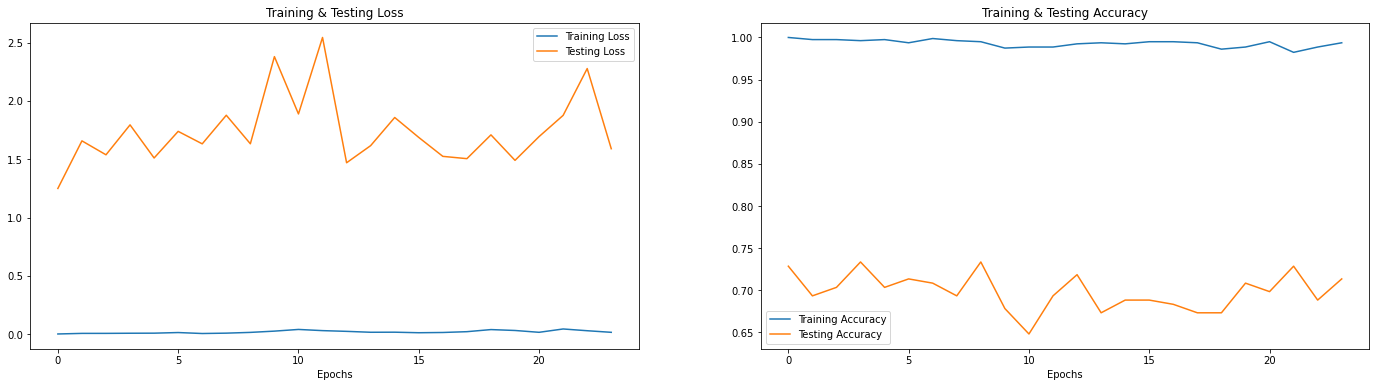

In [15]:
print("Accuracy of our model on test data : " , model.evaluate(X_test,Y_test)[1]*100 , "%")

epochs = [i for i in range(24)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(24,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

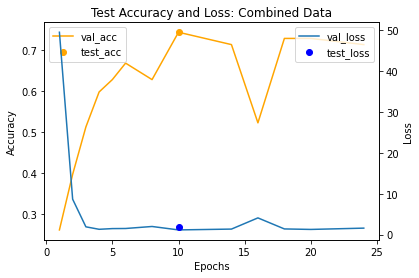

In [21]:
# Plot the test loss and accuracy
#plt.plot(history.history['loss'], label='train_loss')
fig, ax1 = plt.subplots()
ax1.plot(Epoch_list, Val_Acc_Data, label='val_acc', color='orange')
ax1.plot(best_epoch, best_val_acc, 'o', label='test_acc', color='orange')
ax1.legend()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Test Accuracy and Loss: Combined Data')

#plt.plot(history.history['accuracy'], label='train_acc')
ax2 =ax1.twinx()

ax2.plot(Epoch_list, Val_loss_Data, label='val_loss')
ax2.plot(best_epoch, test_loss[best_epoch], 'o', label='test_loss', color='blue')
ax2.legend()
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
#ax2.set_title('Test Loss')

plt.show()


7/7 [==============================] - 5s 754ms/step


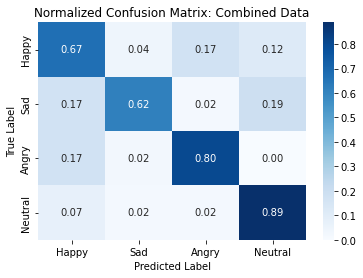

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# assuming x_test and y_test are the test set inputs and labels
# and model is your trained CNN model

# make predictions on the test set
y_pred = model.predict(x_test)

# define y_true as the one-hot encoded version of the test labels
y_true = np.zeros((len(y_test), 4)) # 4 is the number of emotions being classified
y_true[np.arange(len(y_test)), y_test] = 1

# convert y_pred from probabilities to class labels
predicted_labels = np.argmax(y_pred, axis=1)

# define y_pred as the one-hot encoded version of the predicted labels
y_pred = np.zeros((len(predicted_labels), 4)) # 4 is the number of emotions being classified
y_pred[np.arange(len(predicted_labels)), predicted_labels] = 1

# compute confusion matrix
cm = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1), normalize='true')
labels = ['Happy', 'Sad', 'Angry', 'Neutral'] # replace with your own emotion labels

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels, yticklabels=labels)

# add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix: Combined Data')

# show the plot
plt.show()


In [29]:
# Calculate precision and recall
# Get the predicted probabilities for the validation set
y_pred_proba = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred_proba, axis=1)

# Compute precision and recall using scikit-learn metrics
from sklearn.metrics import precision_score, recall_score
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')

print('Precision:', precision)
print('Recall:', recall)



7/7 [==============================] - 5s 744ms/step
Precision: 0.7565986498147302
Recall: 0.7437185929648241
